<a href="https://colab.research.google.com/github/tanupat92/BMIPittProject/blob/main/bmi_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd drive/MyDrive/bmi_project

[Errno 2] No such file or directory: 'drive/MyDrive/bmi_project'
/content/drive/MyDrive/bmi_project


In [ ]:
# use this for SciSpacy
!pip install ../LEMR/en_core_sci_sm-0.4.0.tar.gz

Processing /content/drive/MyDrive/LEMR/en_core_sci_sm-0.4.0.tar.gz
     |████████████████████████████████| 6.3 MB 3.7 MB/s 
     |████████████████████████████████| 10.1 MB 30.6 MB/s 
     |████████████████████████████████| 451 kB 33.2 MB/s 
     |████████████████████████████████| 628 kB 44.6 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.4.0-py3-none-any.whl size=15660349 sha256=e8fcdc706864b4ea8d975269187405c283e190456107584e6afd1c0caed0d059
  Stored in directory: /root/.cache/pip/wheels/2f/a3/1e/33056f77196d8de4ba2816ad60c6658025933dfecc50d6dd96
Successfully built en-core-sci-sm
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall:

In [ ]:
# Google colab has outdated SciSpacy dependencies

!pip uninstall spacy
!pip install spacy
!pip install scispacy
#!pip list --outdated --format=freeze | grep -v '^\-e' | cut -d = -f 1 | xargs -n1 pip3 install -U 

Found existing installation: spacy 3.0.7
Uninstalling spacy-3.0.7:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.7/dist-packages/spacy-3.0.7.dist-info/*
    /usr/local/lib/python3.7/dist-packages/spacy/*
Proceed (y/n)? y
  Successfully uninstalled spacy-3.0.7
     |████████████████████████████████| 6.0 MB 4.1 MB/s 
     |████████████████████████████████| 173 kB 52.9 MB/s 
  Created wheel for langcodes: filename=langcodes-3.2.1-py3-none-any.whl size=169396 sha256=5bb07b5580c3b5a0f959dfede49a4f1e96223aaed7bbc73bc909e968eb490d11
  Stored in directory: /root/.cache/pip/wheels/12/9c/b3/d42c928e622075d3b6056733125190086e44c9230878e6eb2b
Successfully built langcodes
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-sci-sm 0.4.0 requires spacy<3.1.0,>=3.0.1, but you have spacy 3.2.0 which is incompatible.
     |██████████████████████████████

In [ ]:
import spacy
import scispacy

from scispacy.linking import EntityLinker

nlp = spacy.load("en_core_sci_sm")

# This line takes a while, because we have to download ~1GB of data
# and load a large JSON file (the knowledge base). Be patient!
# Thankfully it should be faster after the first time you use it, because
# the downloads are cached.
# NOTE: The resolve_abbreviations parameter is optional, and requires that
# the AbbreviationDetector pipe has already been added to the pipeline. Adding
# the AbbreviationDetector pipe and setting resolve_abbreviations to True means
# that linking will only be performed on the long form of abbreviations.

nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})

doc = nlp("Spinal and bulbar muscular atrophy (SBMA) is an \
           inherited motor neuron disease caused by the expansion \
           of a polyglutamine tract within the androgen receptor (AR). \
           SBMA can be caused by this easily.")

# Let's look at a random entity!
entity = doc.ents[1]

print("Name: ", entity)

# Each entity is linked to UMLS with a score
# (currently just char-3gram matching).
linker = nlp.get_pipe("scispacy_linker")
for umls_ent in entity._.kb_ents:
	print(linker.kb.cui_to_entity[umls_ent[0]])


RuntimeError: ignored

# Load data

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import display, clear_output

In [ ]:
faersDf = pd.read_csv("faersflat_202111072313_1millions.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EDA

In [ ]:
faersDf.pt

0         Cognitive disorder
1                  Contusion
2                  Contusion
3                  Contusion
4                 Convulsion
                 ...        
999995              Headache
999996                Nausea
999997          Osteoporosis
999998          Otitis media
999999             Pneumonia
Name: pt, Length: 1000000, dtype: object

pt = symptoms

# Embedding

In [ ]:
disease_list = []

all_cui = []
for dz in tqdm(faersDf.pt):
  if dz in disease_list:
    continue
  else:
    disease_list.append(dz)
    doc = nlp(dz)
    for ent in doc.ents:
      for cui, score in ent._.kb_ents:
        if score>0.8:
          all_cui.append(cui)

  0%|          | 0/1000000 [00:00<?, ?it/s]


NameError: ignored

In [ ]:
doc.ents[0]._.kb_ents

[('C0009241', 1.0),
 ('C4041080', 0.8760485649108887),
 ('C1270972', 0.8700144290924072),
 ('C0025261', 0.8607081770896912),
 ('C1516691', 0.8123463988304138)]

In [ ]:
#with open("all_cui.pkl", "wb") as f:
#  pickle.dump(all_cui, f)
all_cui = pickle.load(open("all_cui.pkl", 'rb'))

In [ ]:
print(len(all_cui))
print(len(set(all_cui)))

36922
14425


In [ ]:
cui_dict = {a:i for i, a in enumerate(set(all_cui))}

In [ ]:
print(faersDf.drugname.unique().size)

3109


In [ ]:
drug_name_dict = {d:i for i, d in enumerate(faersDf.drugname.unique())}

In [ ]:
def symptom_cui(symptoms):
  ind = set()
  for s in symptoms:
    doc = nlp(s)
    for ent in doc.ents:
      for cui, score in ent._.kb_ents:
        if score>0.8:
          if cui in cui_dict:
            ind.add(cui_dict[cui])
  return ind



In [ ]:
m = len(set(all_cui))
n = faersDf.drugname.unique().size
symptom_embedding = np.zeros((n, m))
for i, g in enumerate(faersDf.groupby("drugname")):
  print(i, g[0])
  ind_set = symptom_cui(g[1].pt.unique())
  for j in ind_set:
    symptom_embedding[drug_name_dict[g[0]], j] +=1 

0  FOCALIN XR


/usr/local/lib/python3.7/dist-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
/usr/local/lib/python3.7/dist-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]


1  HERCEPTIN
2  LERCANIDIPINE
3  LEUCOVORIN
4  LEVOTHYROXINE
5  LOESTRIN
6 (HYDROMORPHONE)
7 (IPRATROPIUM)
8 (LEVOFLOXACINA)
9 ?-LIPOIC ACID
10 F-Vitamin
11 FLU VACCINE (INFLUENZA VACCINE) (UNKNOWN)
12 FLU VACCINE NOS
13 FLUTICASON/SALMETEROL
14 FLUTICASONE PROPIONATE
15 FLUTICASONE PROPIONATE (OTC)
16 FLUTICASONE PROPIONATE (UNKNOWN)
17 FLUTICASONE PROPIONATE NASAL SPRAY 50 MCG
18 FLUTICASONE PROPIONATE SPR
19 FLUTICASONE PROPIONATE W/OLOPATADINE HYDROCHL
20 FLUTICASONE PROPIONATE.
21 FLUTICASONE PROPRIONATE (FLUTICASONE PROPIONATE) (INHALANT) (FLUTICASONE PROPIONATE)
22 FLUTICASONE-SALMETEROL (SERETIDE MITE) (SPRAY  (NOT INHALATION))
23 FLUTICASONE-VILANTEROL
24 FLUTICASONE/SALMETEROL (FLUTICASON W/SALMETEROL, FLUTICASONE)
25 FLUTICASONE/SALMETEROL 250/50 UG
26 FLUTICASONE?SALMETAROL
27 FLUTICSON CAPSULE (FLUTICASONE FUROATE)
28 FLUTIFORM AEROSOL
29 FLUTINASE POLYNEX
30 FLUVASTATIN PUREN
31 FLUVIRAL
32 FLUVIRIN /01389804/
33 FLUVIRIN 2015-2016
34 FLUVIXAMINE
35 FLUVOXAMINE MALEATE (A

In [ ]:
np.savetxt("embedding_symptoms.txt", symptom_embedding)
with open("cui_dict.pkl", "wb") as f:
  pickle.dump(cui_dict, f)
with open("drugname_dict.pkl", "wb") as f:
  pickle.dump(drug_name_dict, f)

# Load embedding

In [ ]:
from sklearn.model_selection import train_test_split

cui_dict = pickle.load(open("cui_dict.pkl", "rb"))
drug_name_dict = pickle.load(open("drugname_dict.pkl", "rb"))
embedding_dict = pickle.load(open("embedding_dict.pkl", "rb"))
symptom_embedding = np.genfromtxt("embedding_symptoms.txt")
lookup_embedding = np.genfromtxt("lookup_embedding.txt")


In [ ]:
df2 = faersDf.groupby("drugname").first()

In [ ]:
df3 =  df2.reset_index().loc[:, ["drugname", "lookup_value"]]
nolabel = df3.drugname.loc[df3.lookup_value.isna()]
label = df3.drugname.loc[df3.lookup_value.notna()]
  

In [ ]:
labelInd = [drug_name_dict[l] for l in label]

In [ ]:
symptom_embedding.shape

(3109, 14425)

In [ ]:
len(drug_name_dict)

3109

In [ ]:
len(faersDf.lookup_value.unique())

636

# Split train-test 

In [ ]:
faersDf.loc[faersDf.lookup_value == faersDf.lookup_value[0], "drugname"].unique()

array(['FLUTICASONE PROPIONATE', 'FLUTICASONE PROPIONATE.',
       'Fluticasone Propionate nasal spray 50 mcg',
       'FLUTICASONE PROPIONATE NASAL SPRAY 50 MCG',
       'Fluticasone propionate nasal spray USP',
       'Fluticasone Propionate Nasal Spray USP',
       'FLUTICASONE PROPIONATE (OTC)', 'FLUTICASONE PROPIONATE (UNKNOWN)',
       'FLUTICASONE PROPRIONATE (FLUTICASONE PROPIONATE) (INHALANT) (FLUTICASONE PROPIONATE)'],
      dtype=object)

In [ ]:
print(faersDf.groupby("drugname").size().shape)

(3109,)


In [ ]:
# 1 time split 
allDf = faersDf.loc[faersDf.lookup_value.notnull(), ["drugname", "lookup_value"]].groupby("drugname").first().reset_index()
lookup_names = allDf.lookup_value.value_counts().index[np.where(allDf.lookup_value.value_counts() > 1)]
subDf = allDf.loc[allDf.lookup_value.isin(lookup_names),:]
train, test = train_test_split(subDf, test_size=0.25, random_state=1234, stratify = subDf.lookup_value)

In [ ]:
train

,drugname,lookup_value
1373,Lidocaine 5% extra,LIDOCAINE
251,GLYBURIDE AND METFORMIN COMBINATION,GLYBURIDE / METFORMIN ORAL TABLET
624,IMATINIB UNKNOWN,IMATINIB
1219,LISINOPRIL GENERIC FOR ZESTRILL,LISINOPRIL
498,HYOSCYAMINE SULFATTE 0.125MG,HYOSCYAMINE
...,...,...
376,"HEPARIN 10,000 UNITS/ML APP PHARMACEUTICALS",HEPARIN SODIUM
557,Hydroxychloroquine Sulfate Tablet,HYDROXYCHLOROQUINE SULFATE
581,IBUPROFEN (UNKNOWN),IBUPROFEN
975,LAMICTAL DISP,LAMICTAL


In [ ]:
# 10 time split
allDf = faersDf.loc[faersDf.lookup_value.notnull(), ["drugname", "lookup_value"]].groupby("drugname").first().reset_index()
lookup_names = allDf.lookup_value.value_counts().index[np.where(allDf.lookup_value.value_counts() > 1)]
subDf = allDf.loc[allDf.lookup_value.isin(lookup_names),:]
trains = []
tests = []
for random_state in range(10):
  train, test = train_test_split(subDf, test_size=0.25, random_state=random_state, stratify = subDf.lookup_value)
  trains.append(train)
  tests.append(test)

## size
print("train:", [len(a) for a in trains])
print("test:", [len(a) for a in tests])

train: [834, 834, 834, 834, 834, 834, 834, 834, 834, 834]
test: [279, 279, 279, 279, 279, 279, 279, 279, 279, 279]


In [ ]:
trains[0]

,drugname,lookup_value
1318,Lactulose Solution USP 473mL,LACTULOSE
444,HYDROCODONE 10/ ACETAMINOPHEN 325MG,ACETAMINOPHEN / HYDROCODONE SYRUP
326,Glimiperide,GLIMEPIRIDE
1470,hydrochlorothiazide capsules,HYDROCHLOROTHIAZIDE
1167,LIDOCAINE INFUSION,LIDOCAINE
...,...,...
1417,Losartan hct 1a pharma,LOSARTAN
786,Imodium multisymptoms,IMODIUM
831,Iron proteinatosuccinate,IRON
1023,LASIX (FUROSEMIDE) (INJECTION) (FUROSEMIDE),FUROSEMIDE


In [ ]:
trains[1]

,drugname,lookup_value
1144,LEVOTIROXIN,LEVOTHYROXINE SODIUM
1065,LEUCOVORIN (CALCIUM FOLINATE) (UNKNOWN) (CALCI...,LEUCOVORIN
674,INSULIN CRYSTAL,INSULIN
1309,LOSARTAN ^AGP^,LOSARTAN
220,GLIMIPRIDE,GLIMEPIRIDE
...,...,...
387,HERBAL EXTRACT NOS W/MINERALS NOS/VITAMINS NO,MULTIVITAMIN PREPARATION
613,IKOREL,NICORANDIL
168,GENERIC FOR NUVARING,NUVARING
303,Generic Aspirin,ASPIRIN


In [ ]:
### training set 834
### test set 279

print(train.drugname.size)
print(test.drugname.size)

834
279


# generate embedding tf-idf and dimensionality reduction

In [ ]:
embedding_dict = {} # {lookup drug name: index of lookup embedding}
lookup_embedding = False
for i, lookup_name in tqdm(enumerate(train.lookup_value.unique())):
  sumup_index = []
  for original_name in train.loc[train.lookup_value == lookup_name, "drugname"].unique():
    sumup_index.append(drug_name_dict[original_name])
  if isinstance(lookup_embedding, bool):
    lookup_embedding = np.sum(symptom_embedding[sumup_index,:], axis=0)
  else:
    lookup_embedding = np.vstack((lookup_embedding, np.sum(symptom_embedding[sumup_index,:], axis=0)))
  embedding_dict[lookup_name] = i


212it [00:01, 192.11it/s]


In [ ]:
#with open("embedding_dict.pkl", "wb") as d:
#  pickle.dump(embedding_dict, d)

#np.savetxt("lookup_embedding.txt", lookup_embedding)

In [ ]:
tf = lookup_embedding / np.sum(lookup_embedding+0.01, axis=1, keepdims=True)

In [ ]:
np.sum(lookup_embedding >0, axis=0)+1

array([ 8,  5, 51, ...,  1,  8,  8])

In [ ]:
idf = np.log((1+lookup_embedding.shape[0])/(np.sum(lookup_embedding >0, axis=0)+1))+1

In [ ]:
tfidf = tf*idf
print(tfidf.shape)

(212, 14425)


In [ ]:
lookup_embedding = tfidf

In [ ]:
symptom_embedding = symptom_embedding/ np.sum(symptom_embedding+0.01, axis=1, keepdims=True)
symptom_embedding *= idf 

# Evaluate symptoms embedding

In [ ]:
from scipy.spatial.distance import cosine
import heapq 
from sklearn.decomposition import TruncatedSVD

In [ ]:
def symptom_embedding_eval(test, drug_name_dict, embedding_dict, all_embedding, train_embedding):  
  drug_name_ind = {d[1]:d[0] for d in drug_name_dict.items() }

  allRanks = []
  ranks = []
  for i in tqdm(range(test.shape[0])):
    clear_output(False)
    query_name = test.drugname.iloc[i]
    q_ind = drug_name_dict[query_name]
    h = []
    t = all_embedding[q_ind,:]
    for name in embedding_dict.keys():
      m_ind = embedding_dict[name]
      c = train_embedding[m_ind,:]
      sim = cosine(c, t)
      heapq.heappush(h, (sim, name))
    r = [ a[1] for a in h]
    rank_ind = r.index(test.lookup_value.iloc[i])
    ranks.append(rank_ind)
    allRanks.append(h)
  return (allRanks, ranks)

In [ ]:
svd = TruncatedSVD(n_components=168, n_iter=5, random_state=42)
svd.fit(lookup_embedding)
lookup_svd = svd.transform(lookup_embedding)
symptom_svd = svd.transform(symptom_embedding)
print(svd.explained_variance_ratio_.sum())

0.9518611000229764


In [ ]:
se_svd_all_ranks, se_svd_ranks = symptom_embedding_eval(test, drug_name_dict, embedding_dict, symptom_svd, lookup_svd)

100%|██████████| 279/279 [00:03<00:00, 76.13it/s]


In [ ]:
se_all_ranks, se_ranks = symptom_embedding_eval(test, drug_name_dict, embedding_dict, symptom_embedding, lookup_embedding)

100%|██████████| 279/279 [00:06<00:00, 42.13it/s]


In [ ]:
print((np.array(se_svd_ranks)==0).sum())
print((np.array(se_svd_ranks)<5).sum())


11
26


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


RecursionError: ignored

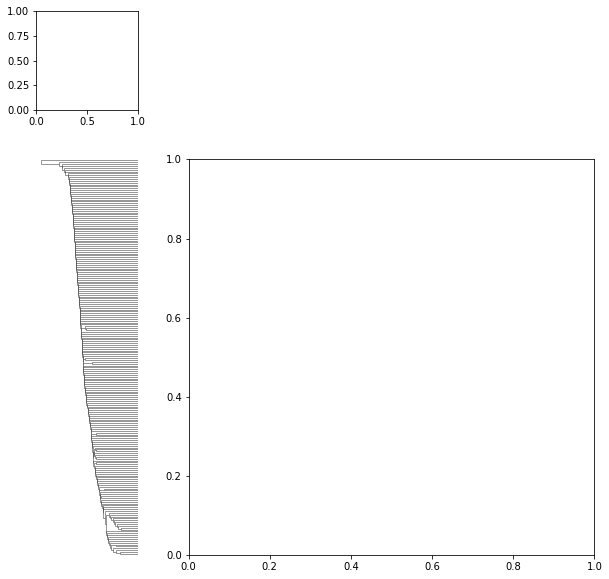

In [ ]:
sns.clustermap(lookup_embedding)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


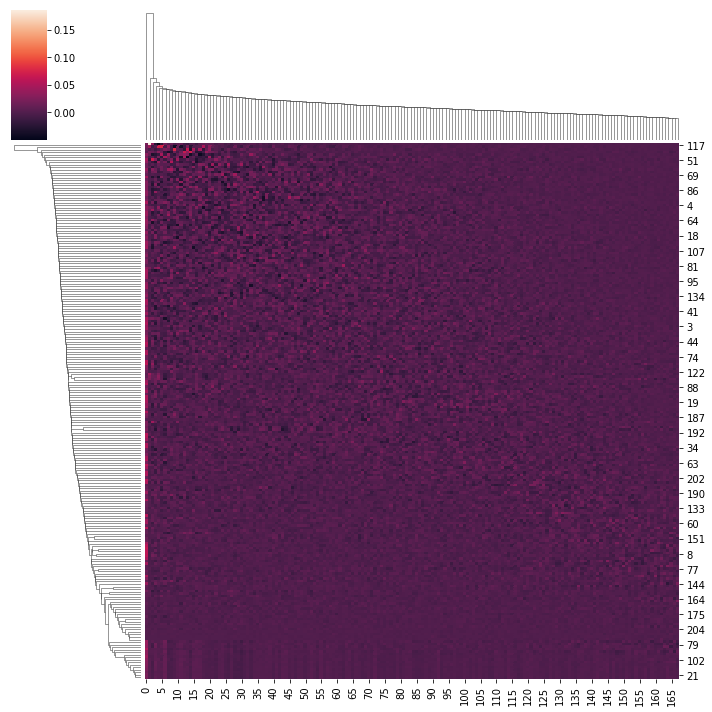

In [ ]:
sns.clustermap(lookup_svd,)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


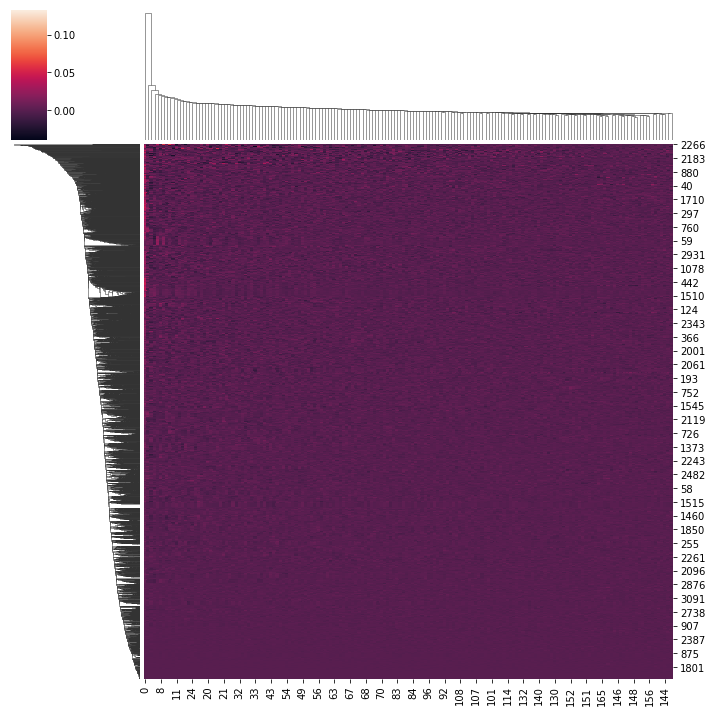

In [ ]:
sns.clustermap(symptom_svd)

In [ ]:
drug_name_ind = {d[1]:d[0] for d in drug_name_dict.items() }

allRanks = []
ranks = []
for i in range(test.shape[0]):
  clear_output(True)
  print("{:.2f}%".format(i*100/test.shape[0]))
  query_name = test.drugname.iloc[i]
  q_ind = drug_name_dict[query_name]
  h = []
  t = symptom_embedding[q_ind,:]
  for ind in range(train.shape[0]):
    match_name = train.drugname.iloc[ind]
    m_ind = drug_name_dict[match_name]
    c = symptom_embedding[m_ind,:]
    sim = cosine(c, t)
    heapq.heappush(h, (sim, train.lookup_value.iloc[ind]))
  r = [ a[1] for a in h]
  rank_ind = r.index(test.lookup_value.iloc[i])
  ranks.append(rank_ind)
  allRanks.append(h)

99.64%


Query (LEVOFLOXACINA) 


Result 


 (0.7160190828764675, 'LEVOFLOXACIN, 500 MG ZYDUS PHARMACEUTICALS')


[(0, 'GABAPENTIN 100MG CAPS'),
 (0, 'GLIMEPIRIDE GLIMEPIRIDE'),
 (0, 'Genuine Bayer Aspirin 325mg Caplets Unkn'),
 (0, 'ICATIBANT ACETATE ++ SYR 30MG/3ML'),
 (0, 'INSULIN TOUJIN SOLOSTAR'),
 (0, 'LEUCOVORIN SANDOZ'),
 (0, 'LORSACOR'),
 (0, 'Lastet Inj. 100mg/5mL'),
 (0.4729537233052702, "IMIQUIMOD 5% CREAM 24'5 E.FOUGERA + CO."),
 (0.4870108239574229, 'Generic Bactrim'),
 (0.5, 'IBUPROFEN PCH TABLET 200MG'),
 (0.5, 'INVANZ 1 g'),
 (0.5614709903464854, 'GENERIC ALENDRONATE SODIUM'),
 (0.6047152924789526, 'HYDROCORTISONE ACETATE '),
 (0.6107505279192385,
  'LEVODOPA/CARBIDOPA/ENTACAPON - 1 A PHARMA 100 MG/25 MG/200 MG FILMTABL'),
 (0.6273220037500351, 'LANSOPRAZOLE BIOGARAN'),
 (0.6372618749449941, 'LE YOU'),
 (0.6464466094067263, 'GABAPENTINE MYLAN 300 MG G?LULES'),
 (0.6899131635269788, 'Ketoconazole cream 2%'),
 (0.7113248654051871, 'FOAM SAFE'),
 (0.7113248654051871, 'HYZAAN (HYDROCHLOROTHIAZIDE W/LOSARTAN)'),
 (0.7113248654051871, 'hair/skin/nail vitamins'),
 (0.7160190828764675, 'LEVOFLOXACIN, 500 MG ZYDUS PHARMACEUTICALS'),
 (0.7182819150904944, 'GENERIC FOR NUVARING'),
 (0.7204915028125263, 'Lidex solution'),
 (0.7226499018873854, 'GABAPENTIN,'),
 (0.7368825942078913, 'LOPERAMIDE LYOC'),
 (0.7382880387048931, 'GADOLINIUM?BASED CONTRAST AGENT'),
 (0.7451764042811873, 'GADOLINIUM CONTRAST'),
 (0.75, 'GOLD BOND EXTRA STRENGTH MEDICATED BODY POWDER')]

# Evaluate edit distance matching

In [ ]:
import re
import nltk
nltk.download('punkt')
import string
!pip install Metaphone
import metaphone

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
  Created wheel for Metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=f17d7ecaa76c41f346e6b9e7137f1b77c44609bb4d8c95aac6ff561eb7a8c845
  Stored in directory: /root/.cache/pip/wheels/1d/a8/cb/6f8902aa5457bd71344e00665c230e9c45255b3f57f2194a0f
Successfully built Metaphone


In [ ]:
def containsDP(s):
  for a in string.digits+string.punctuation:
    if a in s:
      return True
  return False 

def replaceDP(w):
  r = ""
  pre = ""
  w = w.lower()
  for l in w:
    if l not in string.digits+string.punctuation:
      if l ==" " and pre==" ":
        continue
      r+=l
    pre = l
  return r
  
def query_prep(name, mode):
  '''mode mp:metaphone  nm:normal'''
  
  if mode=="mp":
    p = [metaphone.doublemetaphone(replaceDP(t))[0]  for t in nltk.tokenize.word_tokenize(name) if replaceDP(t)]
  elif mode=="nm":
    p = [replaceDP(t)  for t in nltk.tokenize.word_tokenize(name) if replaceDP(t)]
  return p 

def find_top_n(query, allNameUniqueList,allNameMetaphoneList, n, penaltyFn, label="", verbose=False):
  N = len(allNameUniqueList)
  h = []
  for i, drugN in enumerate(allNameUniqueList):
    scores = [nltk.edit_distance(s, allNameMetaphoneList[i]) - penaltyFn(len(s), len(allNameMetaphoneList[i])) for s in query]
    if verbose:
      #clear_output(True)
      #print("{:.2f}%".format(i*100/N))
      print(query, allNameMetaphoneList[i])
      print(scores)
    heapq.heappush(h, (min(scores), drugN))
  if label != "":
    return [h[i]  for i in range(n)], [(h[rank][0], rank) for rank in range(N) if h[rank][1] == label][0]
  else :
    return [h[i]  for i in range(n)]

def edit_distance_eval(train, test, mode, f):
  uniques = list(train.lookup_value.unique())
  metaphones = [metaphone.doublemetaphone(n)[0] for n in uniques]
  n_rank = []
  for i in range(test.shape[0]):
    if mode=="mp":
      a, b = find_top_n(query_prep(test.drugname.iloc[i], "mp"), uniques, metaphones, 20, f, label=test.lookup_value.iloc[i], verbose=False)
    elif mode=="nm":
      a, b = find_top_n(query_prep(test.drugname.iloc[i], "nm"), uniques, [replaceDP(u) for u in uniques], 20, f, label=test.lookup_value.iloc[i], verbose=False)
    clear_output(False)
    print("{:.2f}%".format(i*100/test.shape[0]))
    n_rank.append(b[1])

  return n_rank

In [ ]:
### 10 
ranks10_mp_0 = []
for i in range(10):
  r = edit_distance_eval(trains[i], tests[i], mode="mp", f=lambda x,y: 0)
  ranks10_mp_0.append(r)
ranks10_nm_0 = []
for i in range(10):
  r = edit_distance_eval(trains[i], tests[i], mode="nm", f=lambda x,y: 0)
  ranks10_nm_0.append(r)

99.64%


In [ ]:
functions = [lambda x,y: 0]
all_f = []
uniques = list(train.lookup_value.unique())
metaphones = [metaphone.doublemetaphone(n)[0] for n in uniques]
for f in functions:
  n_rank = []
  for i in range(test.shape[0]):
    a, b = find_top_n(query_prep(test.drugname.iloc[i], "mp"), uniques, metaphones, 20, f, label=test.lookup_value.iloc[i], verbose=True)
    print("{:.2f}%".format(i*100/test.shape[0]))
    n_rank.append(b[1])
  all_f.append(n_rank)

Streaming output truncated to the last 5000 lines.
['HTRKRTSN', 'ASTT'] ANSLN
[7, 3]
['HTRKRTSN', 'ASTT'] KLTRMRSTT
[6, 6]
['HTRKRTSN', 'ASTT'] ASNST
[7, 2]
['HTRKRTSN', 'ASTT'] ASTMNFNNTRKTNSRP
[12, 12]
['HTRKRTSN', 'ASTT'] AMTR
[7, 2]
['HTRKRTSN', 'ASTT'] FRSMT
[6, 3]
['HTRKRTSN', 'ASTT'] KLMPRT
[6, 5]
['HTRKRTSN', 'ASTT'] KRNSTRN
[5, 5]
['HTRKRTSN', 'ASTT'] HTRKSXLRKNSLFT
[8, 12]
['HTRKRTSN', 'ASTT'] PRPRNLLTRKLRT
[10, 11]
['HTRKRTSN', 'ASTT'] HTRKRTSN
[0, 7]
['HTRKRTSN', 'ASTT'] SNTKKK
[7, 5]
['HTRKRTSN', 'ASTT'] HPRNSTM
[5, 5]
['HTRKRTSN', 'ASTT'] AMPRSL
[6, 5]
['HTRKRTSN', 'ASTT'] JNTMSN
[6, 5]
['HTRKRTSN', 'ASTT'] L0MKRPNT
[6, 7]
['HTRKRTSN', 'ASTT'] HTRMRFN
[3, 7]
['HTRKRTSN', 'ASTT'] AMTNPMSLT
[8, 6]
['HTRKRTSN', 'ASTT'] SNKKST
[6, 5]
['HTRKRTSN', 'ASTT'] HTRKSR
[3, 6]
['HTRKRTSN', 'ASTT'] HTRKTN
[2, 5]
['HTRKRTSN', 'ASTT'] ANTPMTPRNTPRLRLTPLT
[15, 16]
['HTRKRTSN', 'ASTT'] ASSRPT
[7, 3]
['HTRKRTSN', 'ASTT'] AMNKLPLNK
[7, 8]
['HTRKRTSN', 'ASTT'] FRSLXMN
[6, 6]
['HTRKRTSN', 'AST

In [ ]:
all_f[0]

[0,
 76,
 0,
 180,
 90,
 22,
 31,
 137,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 2,
 121,
 0,
 25,
 144,
 0,
 0,
 0,
 0,
 15,
 0,
 84,
 0,
 0,
 159,
 0,
 0,
 0,
 39,
 0,
 0,
 0,
 151,
 191,
 0,
 0,
 0,
 0,
 19,
 0,
 0,
 0,
 159,
 0,
 0,
 0,
 0,
 0,
 0,
 48,
 0,
 0,
 0,
 0,
 197,
 0,
 0,
 0,
 116,
 0,
 0,
 40,
 108,
 0,
 0,
 0,
 202,
 78,
 0,
 0,
 68,
 0,
 0,
 0,
 0,
 197,
 0,
 0,
 0,
 0,
 162,
 66,
 0,
 116,
 0,
 14,
 0,
 0,
 125,
 0,
 0,
 62,
 111,
 0,
 88,
 0,
 0,
 0,
 34,
 0,
 0,
 153,
 0,
 0,
 197,
 139,
 0,
 11,
 0,
 24,
 32,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 114,
 0,
 0,
 197,
 20,
 0,
 0,
 0,
 3,
 0,
 84,
 0,
 0,
 0,
 3,
 0,
 205,
 0,
 0,
 84,
 0,
 197,
 0,
 0,
 0,
 209,
 107,
 0,
 145,
 108,
 0,
 0,
 0,
 64,
 197,
 0,
 49,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 145,
 3,
 0,
 98,
 0,
 0,
 168,
 0,
 0,
 0,
 0,
 0,
 193,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 147,
 209,
 0,
 0,
 0,
 0,
 0,
 154,
 0,
 0,
 0,
 0,
 129,
 0,
 145,
 0,
 0,
 209,
 0,
 0,
 0,
 0,
 163,
 0,
 0,
 0,
 0,
 0,
 197,
 0,
 24,


In [ ]:
np.sum(np.array(all_f[0])==0)

188

In [ ]:
np.sum(np.array(all_f[0])<5)

196

In [ ]:
len(all_f[0])

279

In [ ]:
functions = [lambda x,y: 0]
all_f2 = []
uniques = list(train.lookup_value.unique())
metaphones = [metaphone.doublemetaphone(n)[0] for n in uniques]
for f in functions:
  n_rank = []
  for i in range(test.shape[0]):
    a, b = find_top_n(query_prep(test.drugname.iloc[i], "nm"), uniques, [replaceDP(u) for u in uniques], 20, f, label=test.lookup_value.iloc[i], verbose=False)
    clear_output(False)
    print("{:.2f}%".format(i*100/test.shape[0]))
    n_rank.append(b[1])
  all_f2.append(n_rank)

99.64%


In [ ]:
all_f2[0]

[0,
 75,
 0,
 180,
 182,
 10,
 65,
 137,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 9,
 121,
 0,
 106,
 144,
 0,
 0,
 0,
 0,
 26,
 0,
 39,
 0,
 0,
 159,
 0,
 0,
 0,
 82,
 0,
 0,
 0,
 151,
 191,
 0,
 0,
 0,
 0,
 19,
 0,
 0,
 0,
 159,
 0,
 0,
 0,
 0,
 0,
 0,
 200,
 0,
 0,
 0,
 0,
 197,
 0,
 0,
 0,
 57,
 0,
 0,
 85,
 107,
 0,
 0,
 1,
 202,
 152,
 0,
 0,
 138,
 0,
 0,
 0,
 0,
 197,
 0,
 0,
 0,
 0,
 162,
 65,
 0,
 57,
 0,
 5,
 0,
 0,
 125,
 0,
 0,
 126,
 112,
 0,
 88,
 0,
 0,
 0,
 7,
 0,
 0,
 77,
 0,
 0,
 197,
 139,
 0,
 0,
 0,
 60,
 132,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 111,
 0,
 0,
 197,
 85,
 0,
 0,
 0,
 2,
 0,
 84,
 0,
 0,
 0,
 1,
 0,
 205,
 0,
 0,
 84,
 0,
 197,
 0,
 0,
 0,
 207,
 107,
 0,
 145,
 108,
 0,
 0,
 0,
 34,
 197,
 0,
 100,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 145,
 30,
 0,
 48,
 0,
 0,
 168,
 0,
 0,
 0,
 0,
 0,
 193,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 147,
 209,
 0,
 0,
 0,
 0,
 0,
 154,
 0,
 0,
 0,
 0,
 63,
 0,
 145,
 0,
 0,
 209,
 0,
 0,
 0,
 0,
 163,
 0,
 0,
 0,
 0,
 0,
 197,
 0,
 61

In [ ]:
np.sum(np.array(all_f2[0])==0)

190

In [ ]:
np.sum(np.array(all_f2[0])<5)

196

# Evaluate fuzzywuzzy

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

     |████████████████████████████████| 50 kB 2.6 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149861 sha256=0dfdb6fc474fcd4e867ac8407b7f8f17ef9f3f3355785323ab79766c501db517
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
def find_top_n_fuzzy(query, allNameUniqueList, label, partial=True, verbose=False):
  N = len(allNameUniqueList)
  h = []
  query = replaceDP(query)
  for drugN in allNameUniqueList:
    if partial:
      score = fuzz.partial_ratio(query, replaceDP(drugN))
    else:
      score = fuzz.ratio(query, replaceDP(drugN))
    if verbose:
      print("query:", query, "lookup:", drugN)
      print(score)
    heapq.heappush(h, (score, drugN))
  h = h[::-1]
  if label != "":
    return [h[i]  for i in range(N)], [(h[rank][0], rank) for rank in range(N) if h[rank][1] == label][0]
  else :
    return [h[i]  for i in range(N)]


def fuzzy_eval(train, test, partial=True, verbose = False):
  uniques = list(train.lookup_value.unique())
  n_rank = []
  for i in tqdm(range(test.shape[0])):
    a, b = find_top_n_fuzzy(test.drugname.iloc[i], uniques, label=test.lookup_value.iloc[i], partial=partial, verbose=verbose)
    clear_output(False)
    n_rank.append(b[1])
  return n_rank

In [ ]:
ranks10_fuzzy = []
for i in range(10):
  r = fuzzy_eval(trains[i], tests[i])
  ranks10_fuzzy.append(r)

100%|██████████| 279/279 [00:02<00:00, 116.64it/s]


In [ ]:
fz_r = fuzzy_eval(train, test, partial=True, verbose=False)

100%|██████████| 279/279 [00:02<00:00, 120.55it/s]


In [ ]:
fz_r

[8,
 7,
 26,
 31,
 36,
 28,
 80,
 74,
 99,
 97,
 104,
 95,
 82,
 79,
 90,
 4,
 50,
 92,
 24,
 4,
 68,
 68,
 76,
 0,
 80,
 68,
 46,
 44,
 20,
 28,
 20,
 8,
 88,
 101,
 170,
 8,
 16,
 64,
 60,
 20,
 26,
 16,
 16,
 100,
 51,
 66,
 78,
 46,
 84,
 100,
 12,
 68,
 8,
 12,
 6,
 10,
 48,
 94,
 78,
 4,
 13,
 28,
 8,
 20,
 96,
 12,
 88,
 42,
 104,
 36,
 20,
 76,
 187,
 60,
 16,
 36,
 76,
 71,
 4,
 64,
 3,
 13,
 4,
 47,
 100,
 88,
 50,
 80,
 100,
 96,
 68,
 99,
 24,
 96,
 86,
 26,
 26,
 85,
 100,
 76,
 167,
 2,
 88,
 2,
 71,
 100,
 71,
 60,
 100,
 100,
 114,
 75,
 72,
 88,
 97,
 86,
 80,
 36,
 12,
 102,
 58,
 1,
 76,
 32,
 76,
 100,
 88,
 101,
 113,
 42,
 58,
 60,
 70,
 98,
 58,
 44,
 30,
 76,
 72,
 54,
 16,
 6,
 4,
 4,
 127,
 8,
 113,
 44,
 100,
 64,
 107,
 104,
 20,
 84,
 103,
 16,
 76,
 4,
 83,
 13,
 26,
 10,
 36,
 19,
 70,
 26,
 88,
 7,
 68,
 84,
 46,
 84,
 20,
 38,
 14,
 4,
 76,
 43,
 88,
 63,
 88,
 80,
 82,
 18,
 100,
 76,
 100,
 4,
 18,
 20,
 12,
 100,
 138,
 4,
 16,
 26,
 68,
 16,
 66,
 5

# Comparison between methods

In [ ]:
def hit_at_k(predictions):
  
    N = len(predictions)
    hitAt = []
    predictions = np.array(predictions)
    predictions.sort()
    
    for k in range(N):
      atK = (predictions <= k).sum()
      hitAt.append(atK/N)

    return hitAt

In [ ]:
se = hit_at_k(se_ranks)
sv = hit_at_k(se_svd_ranks)
mp = hit_at_k(all_f[0])
nm = hit_at_k(all_f2[0])
sn = hit_at_k(siamese_ranks)
#fz = hit_at_k(fz_r)

In [ ]:
#se10 = [hit_at_k(r) for r in ranks10]
mp10 = [hit_at_k(r) for r in ranks10_mp_0]
nm10 = [hit_at_k(r) for r in ranks10_nm_0]

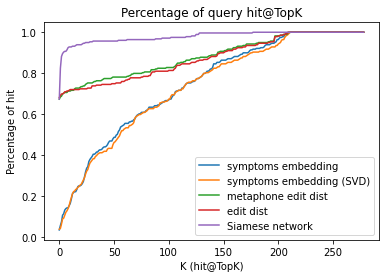

In [ ]:
plt.plot(range(len(se)), se, label="symptoms embedding")
plt.plot(range(len(sv)), sv, label="symptoms embedding (SVD)")
plt.plot(range(len(se)), mp, label="metaphone edit dist")
plt.plot(range(len(se)), nm, label="edit dist")
plt.plot(range(len(se)), sn, label="Siamese network")
#plt.plot(range(len(fz)), fz, label="fuzzywuzzy")
plt.legend()
plt.xlabel("K (hit@TopK)")
plt.ylabel("Percentage of hit")
plt.title("Percentage of query hit@TopK")
plt.show()

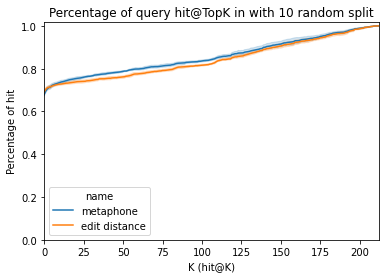

In [ ]:
#dt1 = pd.DataFrame(se10)
#dt1 = pd.melt(dt1.reset_index(), id_vars="index")
#dt1["name"] = "se"
dt2 = pd.DataFrame(mp10)
dt2 = pd.melt(dt2.reset_index(), id_vars="index")
dt2["name"] ="metaphone"
dt3 = pd.DataFrame(nm10)
dt3 = pd.melt(dt3.reset_index(), id_vars="index")
dt3["name"] = "edit distance"
#dt =pd.concat([dt1,dt2,dt3])
dt =pd.concat([dt2,dt3])

p = sns.lineplot( x = "variable", y = "value", hue="name", data=dt.reset_index(drop=True))
p.set(ylim=(0, None))

p.set(xlim=(0, 212))
plt.xlabel("K (hit@K)")
plt.ylabel("Percentage of hit")
plt.title("Percentage of query hit@TopK in with 10 random split")
plt.show()

# Prepare data for RNN

# RNN character-based encoder

In [ ]:
import tensorflow as tf
import string
import random
from sklearn.utils import shuffle

In [ ]:
def add_noise(w, percent):
  ''' edit, del, add'''
  positions = random.choices(range(len(w)), k=int(percent*len(w)))
  for p in positions:
    r = random.random()
    if r <= 0.3333: # edit
      w = w[:p] + random.choice(string.ascii_lowercase) + w[p+1:]
    elif r<= 0.6667: # delete
      w = w[:p] + w[p+1:]
    elif r<=1: # add
      w = w[:p] + random.choice(string.ascii_lowercase) + w[p:]
  return w

def clean(w):
  ''' lower, no number and punc'''
  r = ""
  pre = ""
  w = w.lower()
  for l in w:
    if l not in string.digits+string.punctuation:
      if l ==" " and pre==" ":
        continue
      r+=l
    pre = l
  return r

w = "GLYBURIDE AND METFORMIN COMBINATION"
print(add_noise(w,0.2))
w = "5% Lidocain      (Saline)"
print(clean(w))

GLYURIDE A METFORIN COMBINATNi
 lidocain saline


In [ ]:
train

,drugname,lookup_value
242,GLUCOSAMINE CHONDROITIN ADV,CHONDROITIN / GLUCOSAMINE ORAL TABLET
1400,Lopinavir and ritonavir,LOPINAVIR / RITONAVIR ORAL TABLET
720,IRBESARTAN HYDROCHLOROTHIAZIDE TEVA,HYDROCHLOROTHIAZIDE / IRBESARTAN ORAL TABLET
967,LACTULOSE (LACTULOSE) UNKNOWN,LACTULOSE
664,INFANTS TYLENOL SUSPENSION,ACETAMINOPHEN
...,...,...
1367,Levothyroxine 25mcg tab,LEVOTHYROXINE
187,GENTAMYCIN (GENTAMYCIN SULFATE),SULFATE
1212,LISINOPRIL 20MG TABLETS,LISINOPRIL
1469,hydrochlorothiazide 12.5mg daily,HYDROCHLOROTHIAZIDE


In [ ]:
def clean_dataset(train):
  x = []
  y = []
  for i in range(train.shape[0]):
    w = clean(train.drugname.iloc[i])
    v = clean(train.lookup_value.iloc[i])
    x.append(w)
    y.append(v)
  return x,y

def encode_dataset(x,y):
  encode_dict = {l:i+1 for i,l in enumerate(string.ascii_lowercase + " ")}
  Xtrain = [[encode_dict[m] for m in n] for n in x]
  Ytrain = [[encode_dict[m] for m in n] for n in y]
  return Xtrain, Ytrain

def clean_encode_padding(q):
  q = clean(q)
  encode_dict = {l:i+1 for i,l in enumerate(string.ascii_lowercase + " ")}
  return tf.keras.preprocessing.sequence.pad_sequences(
    [encode_dict[m] for m in q] , padding="post", maxlen=60)

def padding_dataset(Xtrain,Ytrain):
  padded_y = tf.keras.preprocessing.sequence.pad_sequences(
    Ytrain, padding="post", maxlen=60)
  padded_x = tf.keras.preprocessing.sequence.pad_sequences(
      Xtrain, padding="post", maxlen=60)
  return padded_x, padded_y


In [ ]:
xtest, ytest = clean_dataset(test)
Xtest, Ytest = encode_dataset(xtest,ytest)
padded_xTest, padded_yTest = padding_dataset(Xtest,Ytest)

In [ ]:
padded_xTest.shape

(279, 60)

In [ ]:
x = []
y = []
for i in range(train.shape[0]):
  w = clean(train.drugname.iloc[i])
  v = clean(train.lookup_value.iloc[i])
  for _ in range(100):
    x.append(add_noise(w, 0.2))
    y.append(v)

In [ ]:
encode_dict = {l:i+1 for i,l in enumerate(string.ascii_lowercase + " ")}

In [ ]:
Xtrain = [[encode_dict[m] for m in n] for n in x]
Ytrain = [[encode_dict[m] for m in n] for n in y]

(array([10042., 24819., 20488., 15136.,  6101.,  4304.,  1563.,   561.,
          288.,    98.]),
 array([ 3. , 10.6, 18.2, 25.8, 33.4, 41. , 48.6, 56.2, 63.8, 71.4, 79. ]),
 <a list of 10 Patch objects>)

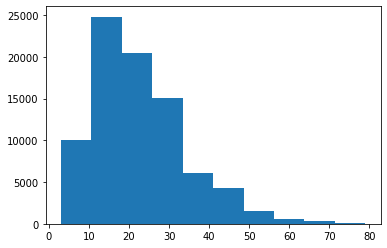

In [ ]:
plt.hist([len(i) for i in Xtrain])

44


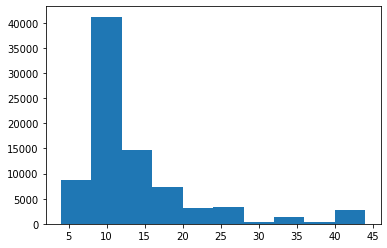

In [ ]:
plt.hist([len(i) for i in Ytrain])
print(max([len(i) for i in Ytrain]))

In [ ]:
padded_y = tf.keras.preprocessing.sequence.pad_sequences(
    Ytrain, padding="post", maxlen=60
)
padded_x = tf.keras.preprocessing.sequence.pad_sequences(
    Xtrain, padding="post", maxlen=60
)

print(padded_y)

[[ 3  8 15 ...  0  0  0]
 [ 3  8 15 ...  0  0  0]
 [ 3  8 15 ...  0  0  0]
 ...
 [ 7 12 25 ...  0  0  0]
 [ 7 12 25 ...  0  0  0]
 [ 7 12 25 ...  0  0  0]]


In [ ]:
len(encode_dict)

27

In [ ]:
def predict(model, query, drugnames):
  predictions = model.predict([clean_encode_padding(query), drugnames])
  return [p[0] for p in predictions]

In [ ]:
x1TrainRnn = []
x2TrainRnn = []
yTrainRnn = []
dUnique = tf.keras.preprocessing.sequence.pad_sequences(
    list(np.unique(Ytrain)), padding="post", maxlen=60)

for i in range(len(padded_x)):
  yTrainRnn.append(1)
  x1TrainRnn.append(padded_x[i])
  x2TrainRnn.append(padded_y[i])
  for j in random.choices(range(len(dUnique)), k=4):  # make y=1 ~ 25% 
    yTrainRnn.append(0)
    x1TrainRnn.append(padded_x[i])
    x2TrainRnn.append(dUnique[j])



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
print(sum(yTrainRnn))
print(len(yTrainRnn)-sum(yTrainRnn))
print("{:.2f}%".format(sum(yTrainRnn)/(len(yTrainRnn)-sum(yTrainRnn))))

83400
333600
0.25%


In [ ]:
x2TrainRnn

[array([ 3,  8, 15, 14,  4, 18, 15,  9, 20,  9, 14, 27, 27,  7, 12, 21,  3,
        15, 19,  1, 13,  9, 14,  5, 27, 15, 18,  1, 12, 27, 20,  1,  2, 12,
         5, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32),
 array([12,  5, 14,  1, 12,  9,  4, 15, 13,  9,  4,  5,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32),
 array([ 9, 14,  4,  1, 16,  1, 13,  9,  4,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32),
 array([ 8,  5, 16,  1, 18,  9, 14, 27, 19, 15,  4,  9, 21, 13,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [ ]:
x1TrainRnn[34]

array([ 7, 12, 21,  3, 15, 19,  1, 13,  9,  4,  5,  6,  3,  8, 15, 14,  5,
        4,  5, 15,  9, 20,  9, 14, 27,  1,  4,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
x1TrainRnnS, x2TrainRnnS, yTrainRnnS = shuffle(x1TrainRnn, x2TrainRnn, yTrainRnn, random_state=1)

In [ ]:
def cosine_similarity(vects):
    x, y = vects
    return tf.reduce_sum(tf.multiply(x,y),axis=1, keepdims=True)/(tf.norm(x,axis=1,keepdims=True)*tf.norm(y,axis=1,keepdims=True))

def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

In [ ]:
input = tf.keras.layers.Input(60)
embedding = tf.keras.layers.Embedding(input_dim=28, output_dim=64, mask_zero=True)
x = embedding(input)
print(x.shape)
x = tf.keras.layers.GRU(128)(x)
x = tf.keras.layers.Dense(64, activation="tanh")(x)
x = tf.keras.layers.Dense(32, activation="tanh")(x)
embedding_network = tf.keras.Model(input, x)

input_1 = tf.keras.layers.Input(60)
input_2 = tf.keras.layers.Input(60)

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = tf.keras.layers.Lambda(cosine_similarity)([tower_1, tower_2])
#output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(merge_layer)
siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=merge_layer)

(None, 60, 64)


In [ ]:
siamese.compile(loss=loss(margin=1), optimizer='RMSprop', metrics=["accuracy"])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
history_rnn = siamese.fit([np.array(x1TrainRnnS), np.array(x2TrainRnnS)],np.array(yTrainRnnS, dtype=np.float32), epochs=10, batch_size=32, callbacks=[early_stopping], validation_split=0.2)
siamese.save("drug_siamese2.h5")

Epoch 1/10
10425/10425 [==============================] - 1091s 104ms/step - loss: 0.0777 - accuracy: 0.9160 - val_loss: 0.0443 - val_accuracy: 0.9643
Epoch 2/10
10425/10425 [==============================] - 1085s 104ms/step - loss: 0.0368 - accuracy: 0.9730 - val_loss: 0.0333 - val_accuracy: 0.9756
Epoch 3/10
10425/10425 [==============================] - 1087s 104ms/step - loss: 0.0293 - accuracy: 0.9804 - val_loss: 0.0294 - val_accuracy: 0.9799
Epoch 4/10
10425/10425 [==============================] - 1086s 104ms/step - loss: 0.0263 - accuracy: 0.9831 - val_loss: 0.0275 - val_accuracy: 0.9810
Epoch 5/10
10425/10425 [==============================] - 1079s 103ms/step - loss: 0.0246 - accuracy: 0.9844 - val_loss: 0.0268 - val_accuracy: 0.9818
Epoch 6/10
10425/10425 [==============================] - 1070s 103ms/step - loss: 0.0235 - accuracy: 0.9853 - val_loss: 0.0259 - val_accuracy: 0.9822
Epoch 7/10
10425/10425 [==============================] - 1077s 103ms/step - loss: 0.0228 - ac

In [ ]:
#siamese.save('drug_siamese1.h5')

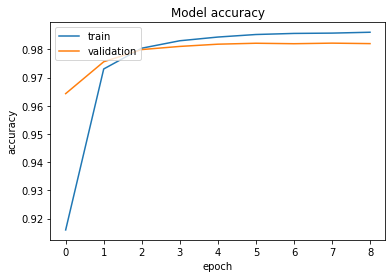

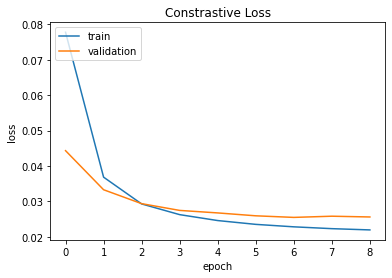

In [ ]:
def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=history_rnn.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=history_rnn.history, metric="loss", title="Constrastive Loss")

# Evaluate siamese network 

In [ ]:
siamese_ranks = []
sm_rank_one = []
for n in range(padded_xTest.shape[0]):
  clear_output(False)
  print("{:.2f}%".format(n*100/padded_xTest.shape[0]))
  predicts = siamese.predict([np.tile(padded_xTest[n,:], (dUnique.shape[0],1)), dUnique])
  argsort = np.argsort(-predicts.flatten())
  for i in range(dUnique.shape[0]):
    if np.array_equal(padded_yTest[n,:], dUnique[i,:]):
      loc = i
  
  sm_rank_one.append(argsort[0])
  siamese_ranks.append(np.where(argsort==loc)[0][0])

99.64%


In [ ]:
dUnique.shape

(212, 60)

In [ ]:
np.unique(np.array(y)).shape

(212,)

In [ ]:
test_eval = test.iloc[np.where(np.array(siamese_ranks)>0)]
test_eval["rank1_drug"]  = np.array([np.unique(np.array(y))[s]  for s in sm_rank_one])[np.array(siamese_ranks)>0]
test_eval["rank"] = np.array(siamese_ranks)[np.array(siamese_ranks)>0]
test_eval.sort_values('rank', ascending=False).head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,drugname,lookup_value,rank1_drug,rank
281,GUARDS UP DAILY,ZINC OXIDE,heparin,177
1430,furantril,FUROSEMIDE,levonorgestrel,128
100,Furantril,FUROSEMIDE,levonorgestrel,128
729,IRINOTECAN HOSPIRA 20 MG/ML CONCENTRADO PARA S...,IRINOTECAN,lidocaine,125
161,GENERAL MULTI MINERAL,MINERAL OIL,gentamicin,125
58,FRESMIN S,HYDROXOCOBALAMIN,furosemide,121
512,Helicid,OMEPRAZOLE,gliclazide,116
99,Frontin,ALPRAZOLAM,acetaminophen,102
793,Influenza vaccine Quadrivalent 2018-2019 seaso...,INFLUENZA VIRUS VACCINE,lidocaine,94
1019,LAROXYL - 40MG/ML GOCCE ORALI SOLUZIONE - TEOF...,AMITRIPTYLINE,levobunolol,88


In [ ]:
test_eval.to_csv("siamese_error_analysis.csv")

In [ ]:
sm_rank_one

[113,
 187,
 95,
 96,
 31,
 8,
 174,
 30,
 66,
 126,
 152,
 109,
 50,
 37,
 80,
 28,
 44,
 75,
 141,
 48,
 73,
 182,
 73,
 127,
 134,
 182,
 41,
 115,
 174,
 130,
 73,
 113,
 172,
 148,
 12,
 113,
 162,
 73,
 6,
 73,
 95,
 162,
 162,
 51,
 103,
 129,
 82,
 57,
 56,
 178,
 116,
 182,
 190,
 99,
 2,
 94,
 59,
 144,
 82,
 143,
 188,
 179,
 113,
 166,
 113,
 99,
 172,
 166,
 1,
 179,
 166,
 123,
 28,
 64,
 162,
 155,
 100,
 145,
 37,
 73,
 55,
 188,
 37,
 141,
 35,
 172,
 160,
 174,
 35,
 115,
 182,
 163,
 151,
 132,
 200,
 95,
 95,
 13,
 182,
 167,
 0,
 153,
 172,
 153,
 148,
 35,
 145,
 26,
 35,
 35,
 188,
 125,
 175,
 118,
 95,
 66,
 81,
 155,
 67,
 86,
 190,
 171,
 167,
 56,
 73,
 182,
 172,
 148,
 188,
 166,
 159,
 181,
 1,
 181,
 13,
 113,
 158,
 73,
 176,
 187,
 162,
 16,
 37,
 37,
 35,
 113,
 188,
 107,
 178,
 123,
 172,
 1,
 166,
 172,
 129,
 162,
 73,
 37,
 138,
 188,
 95,
 94,
 154,
 111,
 1,
 95,
 172,
 203,
 182,
 142,
 57,
 75,
 32,
 121,
 162,
 37,
 167,
 133,
 172,
 150,
 1

In [ ]:
test_eval.sort_values('rank').head(30)

,drugname,lookup_value,rank
220,GLIMIPRIDE,GLIMEPIRIDE,1
1127,LEVOTHYROX 175 (LEVOTHYROXINE SODIUM) (175 MIC...,LEVOTHYROXINE,1
677,INSULIN LINSPRO KWIK PEN 100 U/M,INSULIN LISPRO,1
1131,LEVOTHYROXIN 0.05 MG KSA (LEVOTHYROXINE),LEVOTHYROXINE,1
1136,LEVOTHYROXINE 112MCG TABLETS,LEVOTHYROXINE,1
533,Hydrochloroth,HYDROCHLOROTHIAZIDE,1
1065,LEUCOVORIN (CALCIUM FOLINATE) (UNKNOWN) (CALCI...,LEUCOVORIN,1
507,HYZAAN (HYDROCHLOROTHIAZIDE W/LOSARTAN),HYDROCHLOROTHIAZIDE / LOSARTAN ORAL TABLET,1
756,ISOSORBIDE MONOTRATE,ISOSORBIDE,1
250,GLYBURIDE (MICRONIZED),GLYBURIDE,1


In [ ]:
np.where(np.array(siamese_ranks)>0)

(array([  1,   3,   4,   5,   7,   8,  10,  13,  15,  16,  17,  18,  20,
         27,  28,  30,  37,  39,  43,  45,  48,  52,  54,  56,  63,  64,
         69,  70,  71,  75,  79,  83,  86,  91,  94,  98, 100, 104, 107,
        111, 114, 117, 119, 125, 132, 133, 134, 135, 138, 139, 144, 150,
        152, 153, 158, 164, 174, 177, 183, 189, 191, 192, 198, 199, 201,
        202, 203, 204, 206, 211, 213, 214, 216, 218, 221, 223, 225, 236,
        239, 241, 245, 248, 249, 253, 254, 255, 256, 263, 267, 269, 277]),)